## Importing with skimage and openCV

https://www.youtube.com/watch?v=Q5yVpymvjxU&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=23

https://datacarpentry.org/image-processing/aio/index.html

In [1]:
import numpy as np
# pip install scikit-image
from skimage import io, img_as_float, img_as_ubyte, filters

# pip install opencv-python
import cv2

import matplotlib.pyplot as plt
# importing ipympl makes the plots interactive 
#import ipympl
# it appears to load the latest plot image only

## Skimage

(3024, 4032, 3)
[147 145 148]
<class 'numpy.ndarray'>


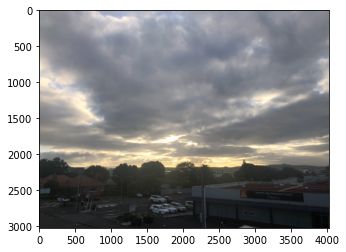

In [2]:
image = io.imread(fname='Images/20220426_1.jpg')
# pass kwarg as_gray=True to import grey scale

print(image.shape)
print(image[0,0]) # RGB for top, left pixel
print(type(image))

plt.imshow(image)
plt.show()

# array shape is Y, X, C (channels = R, G, B)
# note that OpenCV reads the channels in as B, G, R

(3024, 4032, 3)
[0.57647059 0.56862745 0.58039216]
<class 'numpy.ndarray'>


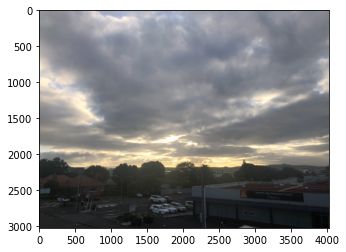

In [3]:
# Converted the RGB values from whole numbers to scaled from 0 - 1
# we would want to do this if we want to do some transformations
image_float = img_as_float(image)

print(image_float.shape)
print(image_float[0,0]) # float RGB for top, left pixel
print(type(image_float))

plt.imshow(image_float)
plt.show()

(3024, 4032, 3)
[147 145 148]
<class 'numpy.ndarray'>


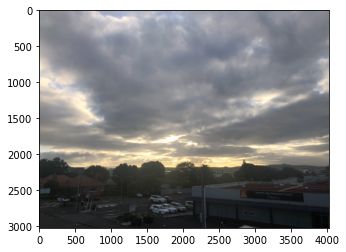

In [4]:
# Convert it back to 8 bit if we want to save it in image format
image_ubite_8bit = img_as_ubyte(image_float)

print(image_ubite_8bit.shape)
print(image_ubite_8bit[0,0]) # RGB for top, left pixel
print(type(image_ubite_8bit))

plt.imshow(image_ubite_8bit)
plt.show()

## Open CV 

(3024, 4032, 3)
[148 145 147]
<class 'numpy.ndarray'>


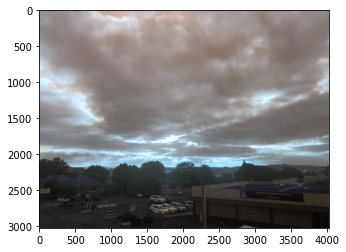

In [5]:
image_cv = cv2.imread('Images/20220426_1.jpg')
# 1 could be passed in as a positional argument after the fig path
# to specify importing color, but this is the default 
# open CV reads BGR not RGB

print(image_cv.shape)
print(image_cv[0,0]) # BGR for top, left pixel
print(type(image_cv))

plt.imshow(image_cv)
plt.show()

(3024, 4032)
146
<class 'numpy.ndarray'>


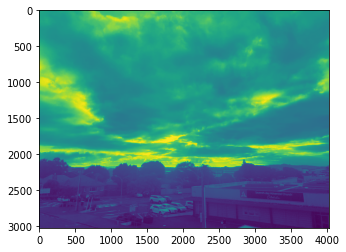

In [6]:
# open CV import as grey scale 

image_cv_greyscale = cv2.imread('Images/20220426_1.jpg', 0)
# open CV reads BGR not RGB

print(image_cv_greyscale.shape)
print(image_cv_greyscale[0,0]) # grey scale for top, left pixel
print(type(image_cv_greyscale))

plt.imshow(image_cv_greyscale)
plt.show()

(3024, 4032, 3)
[147 145 148]
<class 'numpy.ndarray'>


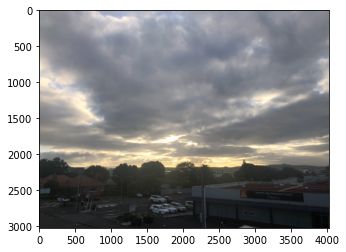

In [7]:
# convert BGR to RGB
image_cv_RGB = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
# COLOR_BGR2HSV 

print(image_cv_RGB.shape)
print(image_cv_RGB[0,0]) # BGR for top, left pixel
print(type(image_cv_RGB))

plt.imshow(image_cv_RGB)
plt.show()

WARNING If you save images using open CV, they will be saved as BGR not RGB

## Interoperability

In [8]:
image_float # the float object from skimage testing above
image_cv_RGB_float = img_as_float(image_cv_RGB)

print(image_float[0,0]) # float RGB for top, left pixel
print(image_cv_RGB_float[0,0]) # float RGB for top, left pixel

# yealds the same results for the top left pixel 

[0.57647059 0.56862745 0.58039216]
[0.57647059 0.56862745 0.58039216]


## Saving images

(3024, 4032, 3)
[0.58246086 0.58278101 0.58325438]
[0.57647059 0.56862745 0.58039216]


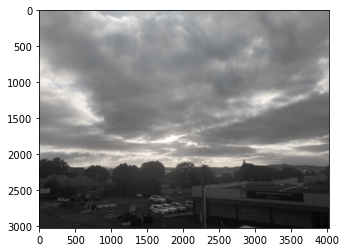

In [9]:
# alter the image using one of the skimage filters

image_gaussian = filters.gaussian(image,sigma=3,multichannel=False)

print(image_gaussian.shape)
print(image_gaussian[0,0]) # floating point for top, left pixel
print(image_float[0,0]) # floating for top, left pixel without the filter

plt.imshow(image_gaussian)
plt.show()

In [10]:
# applying a filter converted the image to floating point
io.imsave('test_save.jpg', image_gaussian)
# saving in this format generates an error

# it's better to convert back to 8bit integer format scaled 0 - 255
image_gaussian_8bit = img_as_ubyte(image_gaussian)
io.imsave('test_save_2.tif', image_gaussian_8bit)


# unsigned integer 8 = uint8

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [11]:

print(image_gaussian_8bit.shape)
print(image_gaussian_8bit[0,0])

jpg_test = io.imread('test_save_2.tif',0)

print(jpg_test.shape)
print(jpg_test[0,0])

tif_test = io.imread('test_save_2.tif',0)

print(tif_test.shape)
print(tif_test[0,0])

(3024, 4032, 3)
[149 149 149]
(3024, 4032, 3)
[149 149 149]
(3024, 4032, 3)
[149 149 149]


In [12]:

# note that the array handling is BGR not RGB, so it needs to be flipped
image_gaussian_8bit_BGR = cv2.cvtColor(image_gaussian_8bit, cv2.COLOR_RGB2BGR)
cv2.imwrite('test_save_3.jpg', image_gaussian_8bit_BGR)
# will not handle floating point images, must be 8bit

True

In [13]:
# we can also use matplotlib.pyplot
plt.imsave('test_save_4.jpg',image_gaussian_8bit )

In [14]:
# check out tifffile library for handling tiff files
# also must be 8bit arrays

## Viewing images

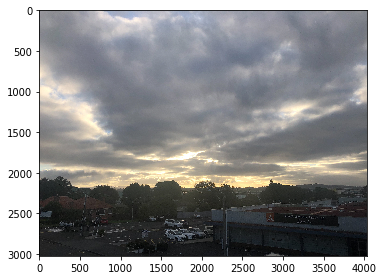

In [15]:
# basic view
io.imshow(image)

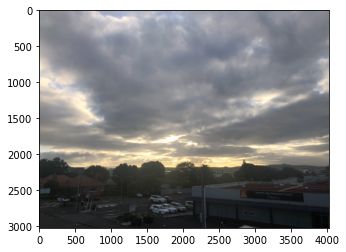

In [16]:
plt.imshow(image)
# same as io.imshow but with more flexibility

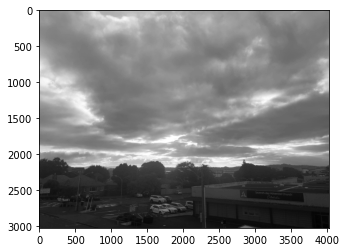

In [17]:
# for grey scale images, we can define the colour maps
plt.imshow(image_cv_greyscale,cmap='gist_gray')
# suffix the colormap name with _r to reverse it

In [21]:
# I'm not keen on this method, esp for notebooks

#cv2.imshow('Some name', image)
#cv2.waitKey(0) # if 0, then keep open until I close
# all others are in milliseconds
#cv2.distroyAllWindows() # buggy



## Play with numpy

In [38]:
# Get colours and corresponding counts
colors, counts = np.unique(image.reshape(-1,3), axis=0, return_counts=1)

print(
    #colours, 
    counts
    )

[ 113  890  325 ...  572 1839 7907]


[]


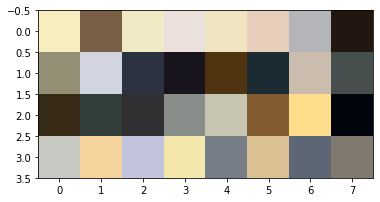

In [44]:
print(colors[-1:-3])
indices = np.random.randint(0, len(colors), size=(4, 8))

plt.imshow(colors[indices])

## Convert between hex and rgb

In [47]:
def rgb_to_hex(r, g, b):
  return ('{:X}{:X}{:X}').format(r, g, b)

print(rgb_to_hex(176, 191, 26))

B0BF1A


In [48]:
def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal)
  
  return tuple(rgb)

print(hex_to_rgb('B0BF1A'))

(176, 191, 26)


https://stackoverflow.com/questions/59669715/fastest-way-to-find-the-rgb-pixel-color-count-of-image

https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html